# Aula 11 - HTML e webscraping

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Web Front-end: HTML
- 2) Webscraping

_______



### Nota:
- Esse scrapping só funciona em um tamanho específico do site. Quando o site muda de tamanho, as classes css mudam e o scrapping não funciona mais. O tamanho do site que funciona é quando ele aparece desse jeito (viewport width: 1028.8):
<div>
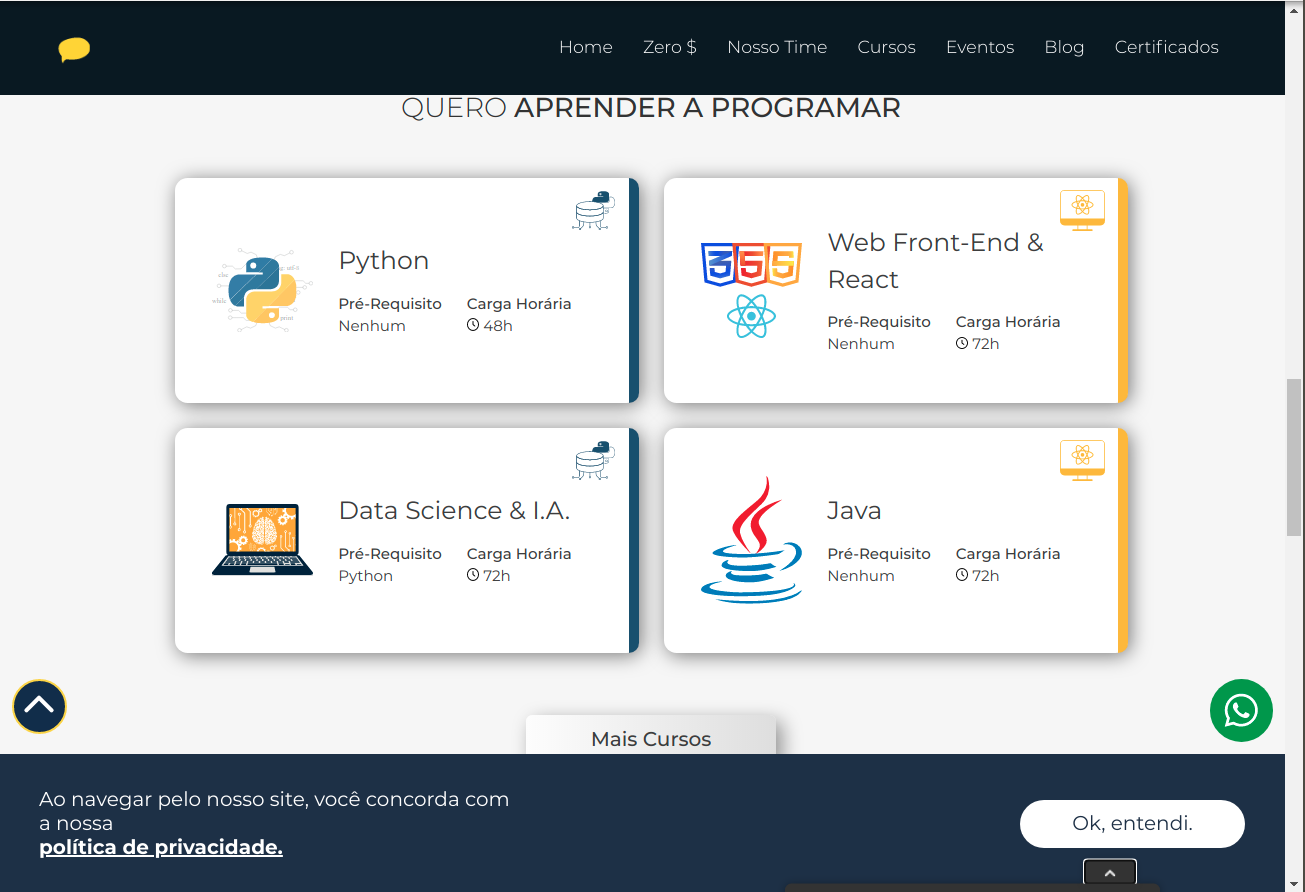
</div>


In [11]:
def set_viewport_width(driver, width):
    window_size = driver.execute_script("""
        return [window.outerWidth - window.innerWidth + arguments[0],
          window.outerHeight];
        """, width)
    driver.set_window_size(*window_size)

____
____
____

## 1) Web Front-end: HTML

O desenvolvimento web é normalmente dividido em duas componentes: o **front-end** e o **back-end**.

- front-end e refere à página que aparece no navegador do usuário. É a "fachada";
- back-end é o que está por trás do site no servidor: comunicação, acesso a banco de dados etc.

Enquanto no back-end qualquer linguagem pode ser usada, no front estamos limitados ao tripé **HTML, CSS e JavaScript**.

- HTML é o "esqueleto" do site. É ele que irá posicionar diferentes elementos, como textos, figuras, vídeos entre outros na tela.

- CSS serve para darmos estilo ao site. Podemos definir classes (e nelas definir comportamentos como cor, fonte e animações) para aplicar ao HTML.

- JavaScript serve para aplicar lógica no próprio site, podendo rodar aplicações e deixar o site mais dinâmico.

Para nossas aplicações de webscrapping, estaremos interessados apenas no HTML.


HTML é a sigla para **HyperText Markup Language**. 

Os "comandos" HTML são chamados de **tags**, e servem para marcar **pedaços do texto**, separando-os entre cabeçalho, corpo, tabelas, etc.

As **tags HTML** são comandos iniciados em `<` e terminados em `>`. 

A maioria das tags vem em pares: utilizamos uma `<tag>`, colocamos algum conteúdo que desejamos que seja afetado por ela, e em seguida fechamos com  `</tag>`.

Um documento HTML costuma abrir e fechar com as tags `<html>` e `</html>`. 

Em seguida, ele se subdivide em **head** e **body**.

A tag `<head>` é o cabeçalho. 

> Nela colocamos informações úteis para o navegador interpretar o restante do documento, como padrões de estilo, links base, scripts etc.

A tag `<body>` é aonde entra todo o conteúdo: textos, imagens, links... 

Um exemplo de código HTML para uma página bem simples (cole no bloco de notas):

```html
<html>
    <head>
        <title>Meu primeiro site!</title>
    </head>

    <body>
        <h1>Um site de exemplo</h1>
        <h2>Site de exemplo pra entendermos HTML.</h2>
        <p>Este é um site feio e bobo para vermos como HTML funciona.</p>
        <p>Se você quer aprender HTML de verdade, clique <a href="https://letscode-academy.com/cursos/web-frontend-react">aqui</a>.</p>
    </body>
</html>
```


Podemos acessar o código-fonte HTML de qualquer site, de maneira bem simples!

Podemos simplesmente clicar em algum lugar da página **com o botão direito**, e depois selecionar **exibir código-fonte**, ou algo do tipo (varia de navegador pra navegador).

Há também algumas ferramentas um pouco mais avançadas, que são de grande auxilio aos desenvolvedores, como o **inspecionador** ou **inspetor de elemento**

Em navegadores como Chrome e Firefox atalhos como **ctrl+shift+i** ou **F12** funcionam.

Agora que conhecemos um pouco mais sobre HTML, vamos ao nosso objetivo principal: webscraping!

___
___
___

## 2) Webscraping

O webscraping significa "raspagem de sites", e é exatamente esse o seu propósito: **extrair informações de um website**, para que estas possam ser utilizadas no Python.

**Para que iríamos querer fazer isso?**

Imagine que você queira coletar dados de um site que não disponibiliza uma API: usar webscraping é uma forma direta de fazer isso!

Ou então, se vc precisa periodicamente tomar informações de um site, de forma automática.


A biblioteca padrão para webscraping do Python é o `beautiful soup`.

Essa biblioteca é capaz de ler o HTML de um site, e criar um objeto a partir dele.

Com isso, fica fácil acessar alguns elementos do site, como tabelas ou valores!

Vamos aprender a usá-lo!

__IMPORTANTE: em webscraping, cada caso é um caso!__

Então, é importante aprender o princípio da técnica, e adapta-la para seu caso.

Nesta aula, vamos extrair as informações resumidas sobre cada curso que a Let's Code oferece. 

Extrairemos: **título, pré-requisito e link para a página do curso.** 

O site é: https://letscode-academy.com/

In [ ]:
import bs4

A primeira coisa é explorar o site, para descobrir como a informação que queremos extrair está codificada em HTML.

Pelas ferramentas de inspeção de código e elementos em um navegador, observamos que todas elas estão contidas em tags **(omitido)** 
<!--  `<a class='card__link'>` -->

Vamos utilizar o bs4 para encontrar essa estrutura no HTML!

O passo-a-passo é:

- Use a requests para fazer uma requisição ao site, com o método `.get()`;
- Capte o HTML do site com o atributo `.text`;
- Instancie a classe `BeautifulSoup` da `bs4`para criar o objeto referente ao HTML;
    - Os argumentos são o HTML captado do requests e o argumento "html.parser" para a construção do objeto
- Com issso, o objeto está criado!

### OBSERVAÇÃO IMPORTANTE:

Com o uso dos frameworks de frontend, há casos (como, por exemplo, do site da Let's Code até, pelo menos, Abril de 2021) em que o HTML não está completo no momento do carregamento da página, de modo a ser acessado imediatamente com a requests, pois parte do HTML é renderizado apenas no navegador. Nestes casos, é necessário usar o webdriver do selenium para que o HTML seja captado!

Por esta ser uma abordagem mais geral, é ela que seguiremos aqui neste Notebook, e recomendamos ser seguida.

No entanto, é importante frisar que **a única alteração** no procedimento é na forma como o HTML é capturado. Daí pra frente, o procedimento é **exatamente o mesmo** (do que seria se o HTML fosse capturado com o requests), com a utilização do bs4 para a criação do objeto sopa, e daí por diante.

Assim, o passo-a-passo acima é alterado para:

- Use o selenium e seu webdriver para fazer a requisição ao site, com o método `get()`;
- Capte o HTML do site com os métodos `find_element_by_tag_name('body')` e `get_attribute('innerHTML')`;
- Instancie a classe `BeautifulSoup` da `bs4`para criar o objeto referente ao HTML;
    - Os argumentos são o HTML captado do requests e o argumento "html.parser" para a construção do objeto
- Com isso, o objeto está criado!

**Obs.:** para instalar o selenium siga as orientações na página: https://pypi.org/project/selenium/

Coloque o arquivo do driver baixado em uma pasta e adicione essa pasta ao PATH ou, mais fácil, passe o endereço do driver na hora de instanciar o webdriver, como em:  

```python 
from selenium import webdriver
driver = webdriver.Chrome('caminho/para/o/driver/chromedriver.exe')
```

In [ ]:
!pip install selenium

In [ ]:
from selenium import webdriver

driver = webdriver.Chrome('../chromedriver') # o chromedriver está no parent folder
set_viewport_width(driver, 1028.8)
driver.get("http://letscode-academy.com/")
element = driver.find_element_by_tag_name('body')
resposta = element.get_attribute('innerHTML') 
resposta

In [ ]:
# aqui, criamos um objeto da classe BeautifulSoup, passando como argumento
site = bs4.BeautifulSoup(resposta, 'html.parser')

In [ ]:
print(site.prettify())

Agora que temos o objeto do bs criado, podemos usar os métodos deste objeto para extrair a informação que queremos!

Lembrando que já descobrimos que queremos extrair os dados dentro da seguinte tag: 

`<a class='card__link'>`

Pra isso, utilizaremos o método `.find()` ou `.find_all()`. Esses métodos suportam diversos argumentos para busca. Os mais comuns são:

- Primeiro argumento posicional: A **tag HTML** que queremos extrair (no nosso caso, é a `a`).
- O argumento nomeado "class_", que indica qual é a **classe CSS** que queremos extrair (no nosso caso, é a `card__link`)

`.find()` vai retornar **a primeira aparição** da tag no HTML, enquanto `.find_all()` retorna **uma lista com as aparições**:

In [ ]:
# encontrando a terceira tag do tipo <a class='card__link'>
total = site.find_all('a', class_ = 'card__link')[2]

total

É possível visualizar a extração de forma mais bonita, usando o método `.prettify()`:

In [ ]:
print(total.prettify())

Como extraímos agora as informações que queremos (título do curso, pré-requisitos e link)?

O atributo `.text` retorna **apenas os textos** do objeto sopa em forma de string, sem as Tags.

Com isso, é possível selecionar toda a informação que queremos! Mas, com alguns detalhes...

In [ ]:
total.text

Procurando especificamente pelas informações que queremos dentro do card do curso, identificamos as seguintes tags:

**(Omitido)**


Vamos criar objetos pra essas tags:

In [ ]:
titulo = ...

print(titulo.prettify())

In [ ]:
requisitos = ...

print(requisitos.prettify())

In [ ]:
horario = ...

print(horario.prettify())

Vamos pegar o atributo text de cada um:

In [ ]:
print('Titulo:', titulo.text)
print('Requisitos:', requisitos.text)
print('Horario:', horario.text)

Agora só falta pegar o link!

Para fazer isso, identificamos que o link é o que já está com a tag `<a class="card__link" href="/cursos/python_adulto">`

Neste caso, o link está dentro da própria tag, com o parâmetro `href`

> Note que o `href` é `/cursos/python_adulto`. Mas o link completo deve conter também o domnínio-base do site, que nada mais é do que o que vem antes da barra: `https://letscode-academy.com`.

> Assim, o link completo é: `https://letscode-academy.com/cursos/python_adulto`

Como o link está dentro da tag, sua extração **não é com o `.text`**, mas sim utilizando uma estrutura de dicionário:

In [ ]:
# acessando o "href", passando como chave de um dicionário:
link = total['href']

link 

In [ ]:
# pra ter o endereço completo, precisamos concatenar com o dominio base do site:
texto_link = "https://letscode-academy.com" + link

texto_link

Agora sim! Temos extraídos:

In [ ]:
print('Titulo:', titulo.text)
print('Requisitos:', requisitos.text)
print('Horario:', horario.text)
print('Link:', link)

Vamos juntar tudo agora:

Perfeito!

Agora que sabemos exatamente o que queremos extrair, usando a primeira aparição, vamos fazer o mesmo pra **todas as aparições**. 

Mas, antes, vamos organizar o nosso código que faz a extração das infomações de 1 curso em uma função para facilitar o nosso trabalho daqui para frente:

In [ ]:
def extrai_curso(tag):
    ...

    return [titulo, requisitos, horario, link]

In [ ]:
extrai_curso(total)

In [ ]:
from selenium import webdriver
import bs4

#######################################################
# fazendo a requisição
# e criando o objeto sopa de todo o site

driver = webdriver.Chrome('../chromedriver')
driver.get("http://letscode-academy.com/")
element = driver.find_element_by_tag_name('body')
resposta = element.get_attribute('innerHTML') 

site = bs4.BeautifulSoup(resposta, 'html.parser')

#######################################################
# pegando apenas a tag que nos interessa, e o texto

# agora temos uma lista com todas as aparições da tag!
total_todos = site.find_all('a', class_ = 'card__link')

# vamos fazer uma lista de listas com titulo, pre_faixa e link
lista_todos = []

for total in total_todos:

    lista = extrai_curso(total)
    lista_todos.append(lista)
    
lista_todos

Tentando entender pq aconteceu o erro...

In [ ]:
%debug

Vamos então adicionar gerenciamento de errors ao nosso código.

Nos casos em que houver um erro, vamos adicionar "Não disponível" ao campo

In [ ]:
def extrai_curso(tag):
    ...
    
    return [titulo, requisitos, horario, link]

Mas espera. Tem muito mais curso oferecido na Let\`s Code! Então qual o problema?

Note que na pagina nem todos os cursos são carregados. Temos que clicar no botão "Mais Cursos" para que eles sejam exibidos. 

Vamos clickar usando o Selenium:

Parece que precisamos rolar a pagina até o botão

Agora que temos nossa lista de listas, podemos escrevê-la pra um arquivo da maneira que quisermos

#### Usando o Pandas

In [ ]:
import pandas as pd

df = pd.DataFrame(lista_todos, columns=['Nome', 'Pré-requisito', 'Carga Horária', 'Caminho no site'])

display(df)

df.to_excel("cursos_LC.xlsx")

___
___
## Objeto sopa com XML
___
___

In [ ]:
import requests
resposta = requests.get("http://servicos.cptec.inpe.br/XML/listaCidades?city=sao paulo")

sopa = bs4.BeautifulSoup(resposta.text, 'lxml')

print(sopa.html.prettify())

In [ ]:
# obtendo o id

In [ ]:
codigo = ...
url = f'http://servicos.cptec.inpe.br/XML/cidade/{codigo}/previsao.xml'

resposta = requests.get(url)

resposta

In [ ]:
resposta.headers

In [ ]:
resposta.text

In [ ]:
site = bs4.BeautifulSoup(resposta.text, 'lxml')

site

In [ ]:
site.nome

In [ ]:
site.nome.text

In [ ]:
site.previsao

In [ ]:
site.previsao.dia

In [ ]:
site.find_all("previsao")